<a href="https://colab.research.google.com/github/LeonardoMafra/Python_Data_Science/blob/main/Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#LIBRARIES
import pandas as pd
from google import colab as cl
import pandas as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score,f1_score, adjusted_rand_score, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import binom
import pickle


In [2]:
# CARREGANDO A BASE DE DADOS DO IRIS

iris = datasets.load_iris()
x = iris.data
columns = iris.feature_names
y = iris.target

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
# Lista para armazenar os valores da Silhouette Score

silhouete_scores = []

In [5]:
# Testar diferentes Clusters


for n_clusters in range(2,11):
  kmens = KMeans(n_clusters = n_clusters, random_state=42 )

# inicializa o modelo Kmeans com numero de clusters atual
  cluster_labels = kmens.fit_predict(x)

  silhouette_avg = silhouette_score (x,cluster_labels)

  silhouete_scores.append(silhouette_avg)

In [6]:
print(silhouete_scores)

[0.6810461692117462, 0.551191604619592, 0.49764331793219224, 0.4930804067193521, 0.36784649847122436, 0.3542978877198849, 0.34467972180561923, 0.31558878533897633, 0.3014143745325133]


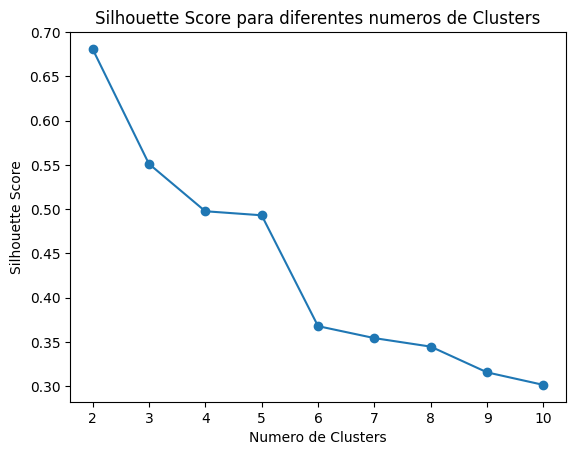

In [7]:
plt.plot(range(2,11), silhouete_scores, marker = 'o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes numeros de Clusters')
plt.show()

In [8]:
# SEPARÇÃO DOS DADOS COM TRAIN TEST SPLIT

x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [28]:
kmeans = KMeans(n_clusters= 2 , random_state= 42)
kmeans.fit(x_train)

KMeans(n_clusters=2, random_state=42)

In [29]:
#parametros de distribuição

n = 10 # numero de tentativas
p = 0.4 # possiblidade de sucesso


In [23]:
prob_3 = binom.pmf(3,n,p)
print(f'Probabilidade de 3 sucessos em 10 tentativas: {prob_3:.4f}')

Probabilidade de 3 sucessos em 10 tentativas: 0.2150


In [30]:
n = 30_353_607 # numeros de giros
p = 1/7 # probablidade de sucesso
k = 1 # numero de sucessos

prob_jackpot = binom.pmf(k,n,p) # funcao de massa
print(f'A Probabilidade de ganhar o jackpot em giros {prob_jackpot:.10f}')

A Probabilidade de ganhar o jackpot em giros 0.0000000000


In [31]:
y_pred_test = kmens.predict(x_test)

# calculando a acuracia

accuracy = accuracy_score(y_test,y_pred_test)
print(f'Acuracia: {accuracy}')

# calculando f1 score

f1 = f1_score(y_test, y_pred_test, average='weighted')
print(f'F1 Score: {f1}')

# calculando o indice range ajustado

adjusted_rand = adjusted_rand_score(y_test, y_pred_test)
print(f'Indice de Range Ajustado: {adjusted_rand}')

Acuracia: 0.0
F1 Score: 0.0
Indice de Range Ajustado: 0.4363858400226369


In [32]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [33]:
y_pred_test

array([5, 1, 8, 5, 0, 1, 4, 9, 5, 5, 9, 6, 1, 6, 1, 0, 3, 4, 5, 9, 6, 7,
       1, 9, 8, 9, 9, 3, 6, 6], dtype=int32)

MODELO SUPERVISIONADO - QDA

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score,accuracy_score


# carregando a base de dados iris

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [35]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train,y_train )

QuadraticDiscriminantAnalysis()

In [39]:
# treinamento

y_pred = qda_model.predict(x_test)

In [41]:
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test,y_pred)


print(f'F1-Score: {f1}')
print(f'Acuracia: {accuracy}')

F1-Score: 0.9664109121909632
Acuracia: 0.9666666666666667


In [43]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [44]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

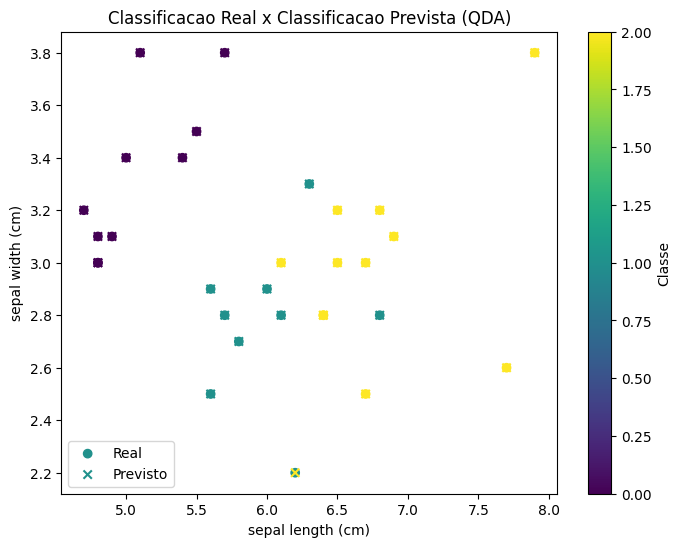

In [45]:
#criando grafico de dispersao

plt.figure(figsize=(8,6))


# plotando pontos do conjunto de teste com a classe real

plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='viridis', marker='o', label= 'Real')

# plotando os pontos do conjunto de teste com a classe prevista

plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, cmap='viridis', marker='x', label= 'Previsto')

#adicionado legendas e rotulos

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Classificacao Real x Classificacao Prevista (QDA)')
plt.legend()
plt.colorbar(label = 'Classe')